## Trabajo final
Jorge Andrés Silva 2160411


In [1]:
#Librerías#
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

## Actividad 1
Leer los archivos.

In [2]:
#Se leen los archivos usando pandas

voltaje=pd.read_csv('Voltage.csv')
intensidad=pd.read_csv('Global_intensity.csv')
reactivo=pd.read_csv('Global_reactive_power.csv')
activo=pd.read_csv('Global_active_power.csv')

## 2
Juntar todos los datos en un solo archivo.

In [3]:
#Juntar los datos#

tabla1=pd.merge(voltaje,intensidad, how='outer', on='Datetime') #Se unen de a dos tablas
tabla2=pd.merge(reactivo,activo, how='outer', on='Datetime')

datos=pd.merge(tabla1,tabla2, how='outer', on='Datetime')  #Se unen las anteriores dos tablas

datos['Datetime'] = pd.to_datetime(datos['Datetime'])  #Formato para ser representado
datos=datos.set_index('Datetime')
datos

,Voltage,Global_intensity,Global_reactive_power,Global_active_power
Datetime,,,,
2010-01-01 00:00:00,240.65,7.4,0.236,1.790
2010-01-01 00:01:00,240.07,7.4,0.234,1.780
2010-01-01 00:02:00,240.15,7.4,0.234,1.780
2010-01-01 00:03:00,240.26,7.2,0.186,1.746
2010-01-01 00:04:00,240.12,7.0,0.102,1.686
...,...,...,...,...
2010-11-26 20:58:00,240.43,4.0,0.000,0.946
2010-11-26 20:59:00,240.00,4.0,0.000,0.944
2010-11-26 21:00:00,239.82,3.8,0.000,0.938


## 3

Hacer un resample de los datos en días y meses.

In [4]:
#Se reorganizan los datos en días y se les saca el promedio con .mean#
dias=datos.resample('D').mean()
dias

,Voltage,Global_intensity,Global_reactive_power,Global_active_power
Datetime,,,,
2010-01-01,242.565722,3.537083,0.114817,0.850175
2010-01-02,243.631743,4.857778,0.086656,1.176235
2010-01-03,241.822778,3.757778,0.090331,0.901894
2010-01-04,241.754160,4.879028,0.100322,1.171833
2010-01-05,240.647167,3.929861,0.133697,0.916776
...,...,...,...,...
2010-12-07,240.218646,3.397222,0.198550,0.770538
2010-12-08,240.794931,1.623750,0.117429,0.367846
2010-12-09,241.619722,4.755694,0.139832,1.119508


In [5]:
#Se reorganizan los datos en meses y se les saca el promedio con .mean#
meses=datos.resample('M').mean()
meses


,Voltage,Global_intensity,Global_reactive_power,Global_active_power
Datetime,,,,
2010-01-31,242.338522,5.430332,0.125182,1.300640
2010-02-28,242.002101,4.836624,0.109467,1.157539
2010-03-31,241.475284,4.920399,0.136368,1.170015
2010-04-30,241.442527,4.363496,0.129557,1.036334
2010-05-31,241.296151,4.551504,0.127221,1.075957
2010-06-30,240.888985,4.170282,0.145525,0.975306
2010-07-31,240.965167,3.337202,0.138093,0.778947
2010-08-31,241.422944,3.954423,0.130815,0.929452
2010-09-30,241.267517,4.223837,0.127700,0.997541


## 4
Regresión lineal

Vamos a usar la fórmula de la ecuación lineal y=mx+b

Donde 
y:Global active power

m:Pendiente

x:Variable a comparar con y

b:Corte con y

In [6]:
#Se definen las funciones#
def func1(x, a, b):
    return a*x+b


    

In [7]:
def get_fit(func,xdata,ydata,labelx,labely,r):
    popt, pcov = curve_fit(func, xdata, ydata)
    popt, pcov = np.around(popt,r), np.around(np.sqrt(np.diag(pcov)),r)
    x=np.linspace(xdata.min(),xdata.max(),100)
    plt.figure(figsize=(8,6))
    plt.plot(x, func(x, *popt), 'r-',label=r'fit: {}$\pm${}'.format(np.around(tuple(popt),r),tuple(pcov)))
    plt.scatter(xdata,ydata,label="Original data")
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.legend()
    plt.show()
    print("Coeficients are : {}".format(popt))
    print("Sigma_Coeficients are : {}".format(pcov))
    return #popt, np.sqrt(np.diag(pcov))

## Minutos

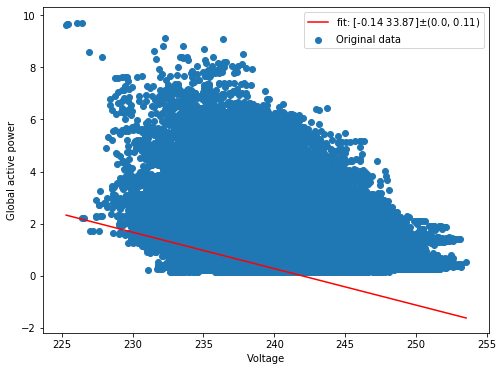

Coeficients are : [-0.14 33.87]
Sigma_Coeficients are : [0.   0.11]


In [8]:
get_fit(func1,voltaje['Voltage'],activo['Global_active_power'],'Voltage','Global active power',2)

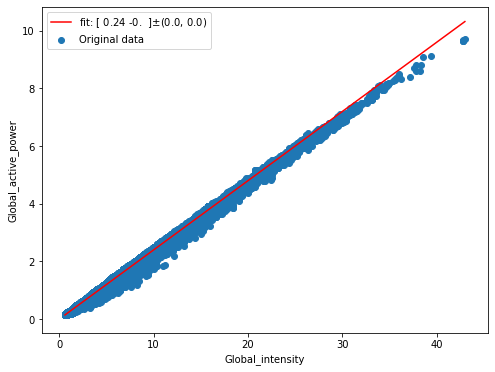

Coeficients are : [ 0.24 -0.  ]
Sigma_Coeficients are : [0. 0.]


In [9]:
get_fit(func1,intensidad['Global_intensity'],activo['Global_active_power'],'Global_intensity','Global_active_power',2)


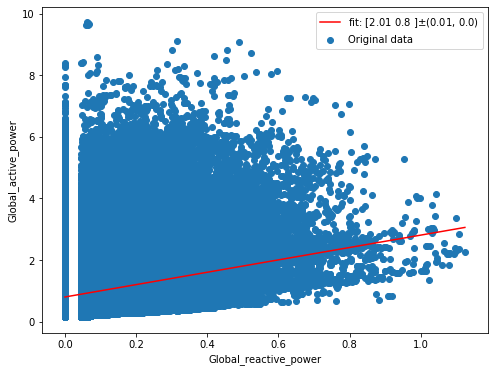

Coeficients are : [2.01 0.8 ]
Sigma_Coeficients are : [0.01 0.  ]


In [11]:
get_fit(func1,reactivo['Global_reactive_power'],activo['Global_active_power'],'Global_reactive_power','Global_active_power',2)

## Días

In [30]:
a=dias['Global_active_power']
v=dias['Voltage']
r=dias['Global_reactive_power']
i=dias['Global_intensity']


intensidad_dias=i.dropna()
activo_dias=a.dropna()
voltaje_dias=v.dropna()
reactivo_dias=r.dropna()

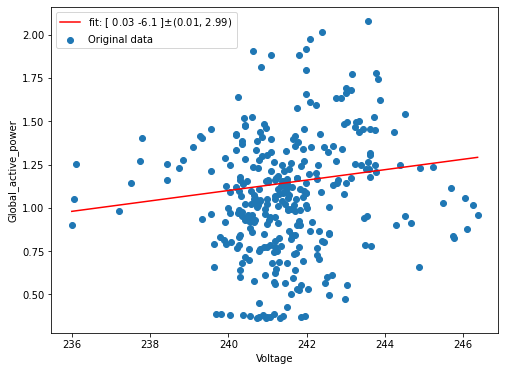

Coeficients are : [ 0.03 -6.1 ]
Sigma_Coeficients are : [0.01 2.99]


In [25]:
get_fit(func1,voltaje_dias,activo_dias, 'Voltage','Global_active_power',2)

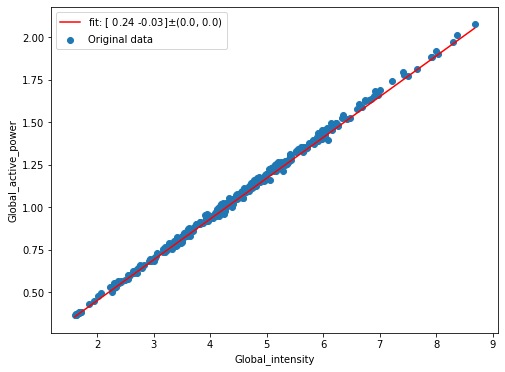

Coeficients are : [ 0.24 -0.03]
Sigma_Coeficients are : [0. 0.]


In [17]:
get_fit(func1,intensidad_dias,activo_dias, 'Global_intensity','Global_active_power',2)



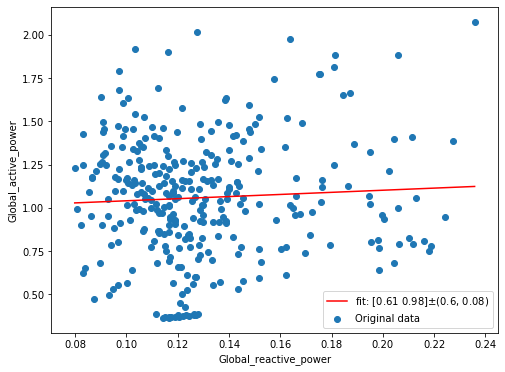

Coeficients are : [0.61 0.98]
Sigma_Coeficients are : [0.6  0.08]


In [31]:
get_fit(func1,reactivo_dias,activo_dias, 'Global_reactive_power','Global_active_power',2)

## Meses

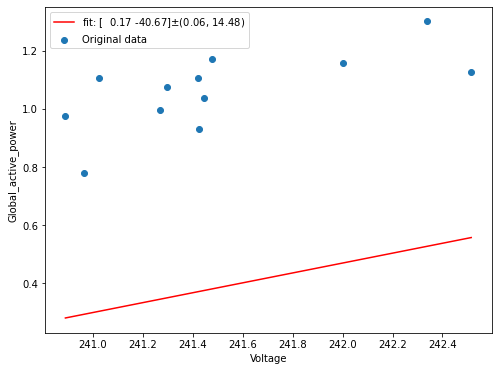

Coeficients are : [  0.17 -40.67]
Sigma_Coeficients are : [ 0.06 14.48]


In [27]:

get_fit(func1,meses['Voltage'],meses['Global_active_power'], 'Voltage','Global_active_power',2)

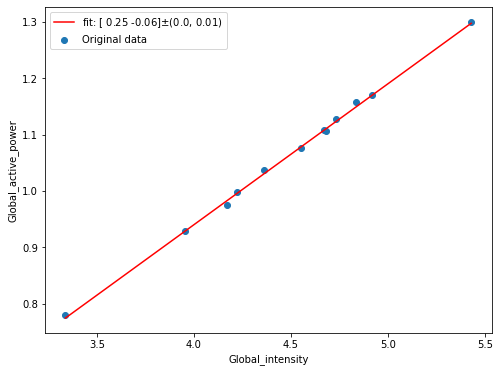

Coeficients are : [ 0.25 -0.06]
Sigma_Coeficients are : [0.   0.01]


In [28]:
get_fit(func1,meses['Global_intensity'],meses['Global_active_power'], 'Global_intensity','Global_active_power',2)

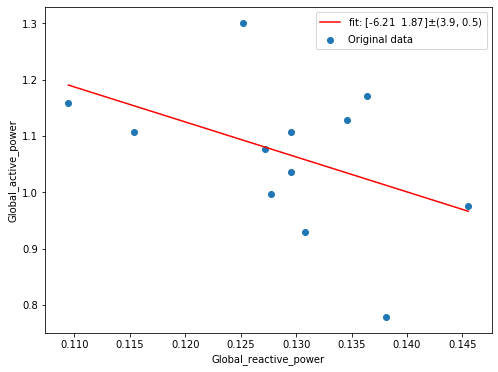

Coeficients are : [-6.21  1.87]
Sigma_Coeficients are : [3.9 0.5]


In [21]:
get_fit(func1,meses['Global_reactive_power'],meses['Global_active_power'], 'Global_reactive_power','Global_active_power',2)

## Errores

In [23]:
def get_fit2(func,xdata,ydata,labelx,labely,r):
    popt, pcov = curve_fit(func, xdata, ydata)
    popt, pcov = np.around(popt,r), np.around(pcov,r)
    x=np.linspace(xdata.min(),xdata.max(),100)
    E=np.sqrt(np.mean((ydata-func(xdata, *popt))**2))
    print("Error on fit is ={}".format(E))
    return popt, pcov

## Minutos

In [24]:
get_fit2(func1,voltaje['Voltage'],activo['Global_active_power'],'Voltage','Global_active_power',2)

Error on fit is =1.3141359640011343


(array([-0.14, 33.87]),
 array([[ 0.  , -0.  ],
        [-0.  ,  0.01]]))

In [25]:
get_fit2(func1,intensidad['Global_intensity'],activo['Global_active_power'],'Global_intensity','Global_active_power',2)

Error on fit is =0.05173763748702566


(array([ 0.24, -0.  ]),
 array([[ 0., -0.],
        [-0.,  0.]]))

In [26]:
get_fit2(func1,reactivo['Global_reactive_power'],activo['Global_active_power'],'Global_reactive_power','Global_active_power',2)

Error on fit is =0.9039028826520699


(array([2.01, 0.8 ]),
 array([[ 0., -0.],
        [-0.,  0.]]))

## Días

In [59]:
get_fit2(func1,voltaje_dias,activo_dias, 'Voltage','Global_active_power',2)

Error on fit is =0.35140059805874996


(array([ 0.03, -6.1 ]),
 array([[ 0.  , -0.04],
        [-0.04,  8.94]]))

In [60]:
get_fit2(func1,intensidad_dias,activo_dias, 'Global_intensity','Global_active_power',2)

Error on fit is =0.022630442847155905


(array([ 0.24, -0.03]),
 array([[ 0., -0.],
        [-0.,  0.]]))

In [32]:
get_fit2(func1,reactivo_dias,activo_dias, 'Global_reactive_power','Global_active_power',2)

Error on fit is =0.3437780892582952


(array([0.61, 0.98]),
 array([[ 0.36, -0.05],
        [-0.05,  0.01]]))

## Meses

In [61]:
get_fit2(func1,meses['Voltage'],meses['Global_active_power'], 'Voltage','Global_active_power',2)

Error on fit is =0.6843367309403187


(array([  0.17, -40.67]),
 array([[  0.  ,  -0.87],
        [ -0.87, 209.62]]))

In [63]:
get_fit2(func1,meses['Global_intensity'],meses['Global_active_power'], 'Global_intensity','Global_active_power',2)

Error on fit is =0.004316919789440401


(array([ 0.25, -0.06]),
 array([[ 0., -0.],
        [-0.,  0.]]))

In [28]:
get_fit2(func1,meses['Global_reactive_power'],meses['Global_active_power'], 'Global_reactive_power','Global_active_power',2)

Error on fit is =0.11429804488782452


(array([-6.21,  1.87]),
 array([[15.19, -1.96],
        [-1.96,  0.25]]))